In [2]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('train.csv')

In [7]:
coords = pd.read_csv('train_coords.csv')

In [17]:
df.columns


Index(['Скважина', 'Дата', 'Характер работы', 'Состояние', 'Время работы, ч',
       'Нефть, т', 'Вода, т', 'Жидкость, т', 'Попутный газ, м3', 'Закачка, м3',
       'Обводненность (вес), %', 'Агент закачки', 'Нефть, м3', 'Жидкость, м3',
       'Добыча растворенного газа, м3', 'Тип скважины', 'Диаметр НКТ',
       'Диаметр штуцера', 'Глубина верхних дыр перфорации', 'Удлинение',
       'Способ эксплуатации', 'Производительность ЭЦН', 'Напор', 'Частота',
       'Коэффициент сепарации', 'Глубина спуска', 'Буферное давление',
       'Давление в линии', 'Пластовое давление', 'Динамическая высота',
       'Затрубное давление', 'Давление на приеме', 'Забойное давление',
       'Дебит нефти', 'Дебит жидкости', 'Обводненность',
       'Состояние на конец месяца', 'Давление наcыщения', 'Газовый фактор',
       'Вязкость нефти в пластовых условиях',
       'Вязкость воды в пластовых условиях',
       'Вязкость жидкости в пласт. условиях', 'объемный коэффициент',
       'Плотность нефти', 'Плотнос

In [20]:
col_new = ["num", "date", "type", "state", "work_time", "oil_weight", "water_weight", 
              "liquid_weight", "gase_volume", "income_volume", "water_percent", "water_type",
             "oil_volume", "liquid_volume", "-", "hole_type", "-", "-", "depth_top", "-",
             "-", "-", "liquid_head", "-", "-", "depth_bottom", "-", "-", "ground_pressure",
             "-", "-", "-", "-", "oil_income", "liquid_income", "-", "-", "-", "-", "-", "-",
             "-", "-", "oil_density", "water_density", "-", "date_start", "-", "-", "-", "-", "-",
             "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]

In [21]:
for i in range(len(col_new)):
    print(col_new[i], " ", df.columns[i])

num   Скважина
date   Дата
type   Характер работы
state   Состояние
work_time   Время работы, ч
oil_weight   Нефть, т
water_weight   Вода, т
liquid_weight   Жидкость, т
gase_volume   Попутный газ, м3
income_volume   Закачка, м3
water_percent   Обводненность (вес), %
water_type   Агент закачки
oil_volume   Нефть, м3
liquid_volume   Жидкость, м3
-   Добыча растворенного газа, м3
hole_type   Тип скважины
-   Диаметр НКТ
-   Диаметр штуцера
depth_top   Глубина верхних дыр перфорации
-   Удлинение
-   Способ эксплуатации
-   Производительность ЭЦН
liquid_head   Напор
-   Частота
-   Коэффициент сепарации
depth_bottom   Глубина спуска
-   Буферное давление
-   Давление в линии
ground_pressure   Пластовое давление
-   Динамическая высота
-   Затрубное давление
-   Давление на приеме
-   Забойное давление
oil_income   Дебит нефти
liquid_income   Дебит жидкости
-   Обводненность
-   Состояние на конец месяца
-   Давление наcыщения
-   Газовый фактор
-   Вязкость нефти в пластовых условиях
-   В

In [27]:
df.columns = col_new

In [28]:
cleaned_data = {}
for col in df.columns:
    if not col == "-":
        cleaned_data[col] = df[col].values

In [29]:
print(cleaned_data.keys())

dict_keys(['num', 'date', 'type', 'state', 'work_time', 'oil_weight', 'water_weight', 'liquid_weight', 'gase_volume', 'income_volume', 'water_percent', 'water_type', 'oil_volume', 'liquid_volume', 'hole_type', 'depth_top', 'liquid_head', 'depth_bottom', 'ground_pressure', 'oil_income', 'liquid_income', 'oil_density', 'water_density', 'date_start'])


In [30]:
new_df = pd.DataFrame(cleaned_data)

In [32]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,hole_type,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,oil_density,water_density,date_start
0,101,12/1/2016,НЕФ,РАБ.,744,186.44,241.84,428.28,7820,0,...,Наклонно-направленно,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,0.87,1-Mar,42232.0
1,102,12/1/2016,НАГ,РАБ.,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,НЕФ,РАБ.,744,554.09,399.36,953.45,23241,0,...,Наклонно-направленно,2387.0,2460.0,2311.00,131.0,18.6528,32.0,0.87,1-Mar,42135.0
3,104,12/1/2016,НЕФ,РАБ.,744,225.65,351.29,576.94,9465,0,...,Наклонно-направленно,2517.0,2318.0,2427.00,130.0,7.395,17.0,0.87,1-Mar,42124.0
4,105,12/1/2016,НЕФ,РАБ.,744,953.70,284.71,1238.41,40002,0,...,Наклонно-направленно,2919.0,2334.0,2816.62,96.0,32.103,45.0,0.87,1-Mar,42111.0


In [35]:
print(len(new_df["num"].unique()))
print(len(new_df["num"]))

268
15670


In [36]:
new_df["type"] = ["oil" if val == "НЕФ" else "water" for val in new_df["type"].values]

In [37]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,hole_type,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,oil_density,water_density,date_start
0,101,12/1/2016,oil,РАБ.,744,186.44,241.84,428.28,7820,0,...,Наклонно-направленно,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,0.87,1-Mar,42232.0
1,102,12/1/2016,water,РАБ.,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,РАБ.,744,554.09,399.36,953.45,23241,0,...,Наклонно-направленно,2387.0,2460.0,2311.00,131.0,18.6528,32.0,0.87,1-Mar,42135.0
3,104,12/1/2016,oil,РАБ.,744,225.65,351.29,576.94,9465,0,...,Наклонно-направленно,2517.0,2318.0,2427.00,130.0,7.395,17.0,0.87,1-Mar,42124.0
4,105,12/1/2016,oil,РАБ.,744,953.70,284.71,1238.41,40002,0,...,Наклонно-направленно,2919.0,2334.0,2816.62,96.0,32.103,45.0,0.87,1-Mar,42111.0


In [38]:
new_df["state"] = [1 if val == "РАБ." else 0 for val in new_df["state"].values]
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,hole_type,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,oil_density,water_density,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,7820,0,...,Наклонно-направленно,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,0.87,1-Mar,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,23241,0,...,Наклонно-направленно,2387.0,2460.0,2311.00,131.0,18.6528,32.0,0.87,1-Mar,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,9465,0,...,Наклонно-направленно,2517.0,2318.0,2427.00,130.0,7.395,17.0,0.87,1-Mar,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,40002,0,...,Наклонно-направленно,2919.0,2334.0,2816.62,96.0,32.103,45.0,0.87,1-Mar,42111.0


In [54]:
new_df = new_df.drop(['hole_type', "oil_density", "water_density", "gase_volume"], axis=1)

In [56]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,water_type,oil_volume,liquid_volume,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,NaN,214.30,449.09,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,"Вода пресная+подтоварная,м.куб.",0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,NaN,636.89,1024.61,2387.0,2460.0,2311.00,131.0,18.6528,32.0,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,NaN,259.37,600.43,2517.0,2318.0,2427.00,130.0,7.395,17.0,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,NaN,1096.20,1372.62,2919.0,2334.0,2816.62,96.0,32.103,45.0,42111.0


In [57]:
print(max(new_df["liquid_head"].values))
print(min(new_df["liquid_head"].values))

2550.0
2050.0


In [58]:
new_df = new_df.drop(["water_type"], axis=1)

In [63]:
print(new_df["date"].unique())

['12/1/2016' '11/1/2016' '10/1/2016' '9/1/2016' '8/1/2016' '7/1/2016'
 '6/1/2016' '5/1/2016' '4/1/2016' '3/1/2016' '2/1/2016' '1/1/2016'
 '12/1/2015' '11/1/2015' '10/1/2015' '9/1/2015' '8/1/2015' '7/1/2015'
 '6/1/2015' '5/1/2015' '4/1/2015' '3/1/2015' '2/1/2015' '1/1/2015'
 '12/1/2014' '11/1/2014' '10/1/2014' '9/1/2014' '8/1/2014' '7/1/2014'
 '6/1/2014' '5/1/2014' '4/1/2014' '3/1/2014' '2/1/2014' '1/1/2014'
 '12/1/2013' '11/1/2013' '10/1/2013' '9/1/2013' '8/1/2013' '7/1/2013'
 '6/1/2013' '5/1/2013' '4/1/2013' '3/1/2013' '2/1/2013' '1/1/2013'
 '12/1/2012' '11/1/2012' '10/1/2012' '9/1/2012' '8/1/2012' '7/1/2012'
 '6/1/2012' '5/1/2012' '4/1/2012' '3/1/2012' '2/1/2012' '1/1/2012'
 '12/1/2011' '11/1/2011' '10/1/2011' '9/1/2011' '8/1/2011' '7/1/2011'
 '6/1/2011' '5/1/2011' '4/1/2011' '3/1/2011' '2/1/2011' '1/1/2011'
 '12/1/2010' '11/1/2010' '10/1/2010' '9/1/2010' '8/1/2010' '7/1/2010'
 '6/1/2010' '5/1/2010' '4/1/2010' '3/1/2010' '2/1/2010' '1/1/2010'
 '12/1/2009' '11/1/2009' '10/1/2009' '9/1

In [64]:
new_df = new_df.drop(["oil_volume", "liquid_volume", "liquid_head"], axis=1)

In [66]:
print(new_df.columns)

Index(['num', 'date', 'type', 'state', 'work_time', 'oil_weight',
       'water_weight', 'liquid_weight', 'income_volume', 'water_percent',
       'depth_top', 'depth_bottom', 'ground_pressure', 'oil_income',
       'liquid_income', 'date_start'],
      dtype='object')


In [67]:
new_df = new_df.drop(["depth_top", "depth_bottom"], axis=1)

In [70]:
print(new_df.columns)

Index(['num', 'date', 'type', 'state', 'work_time', 'oil_weight',
       'water_weight', 'liquid_weight', 'income_volume', 'water_percent',
       'oil_income', 'liquid_income', 'date_start'],
      dtype='object')


In [69]:
new_df = new_df.drop(["ground_pressure"], axis=1)

In [71]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,oil_income,liquid_income,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,Jul-83,15.0,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,18.6528,32.0,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,7.395,17.0,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,32.103,45.0,42111.0


In [72]:
new_df.to_csv("cleaned_train_without_coords.csv", header=True, index=None, sep="\t")

In [76]:
newest = pd.read_csv("cleaned_train_without_coords.csv", sep="\t")

In [77]:
newest.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,oil_income,liquid_income,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,Jul-83,15.0,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,18.6528,32.0,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,7.395,17.0,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,32.103,45.0,42111.0


## Coords ##

In [ ]:
df = newest

In [103]:
coords.columns = ["num", "x", "y"]

In [104]:
coords.head()

,num,x,y
0,101,6622056,504780
1,102,6621645,504916
2,103,6621857,504372
3,104,6621436,504586
4,105,6621585,505642


In [141]:
water_holes = set()
for index, row in df.iterrows():
    if row["type"] == "water":
        water_holes.add(row["num"])
    

In [112]:
types = []
x_water = []
y_water = []
x_oil = []
y_oil = []
for index, row in coords.iterrows():
    if row["num"] in water_holes:
        types.append("water")
        x_water.append(row["x"])
        y_water.append(row["y"])
    else:
        types.append("oil")
        x_oil.append(row["x"])
        y_oil.append(row["y"])

In [110]:
coords.insert(1, "type", types)

ValueError: cannot insert type, already exists

In [108]:
coords.head()

,num,type,x,y
0,101,oil,6622056,504780
1,102,water,6621645,504916
2,103,oil,6621857,504372
3,104,oil,6621436,504586
4,105,oil,6621585,505642


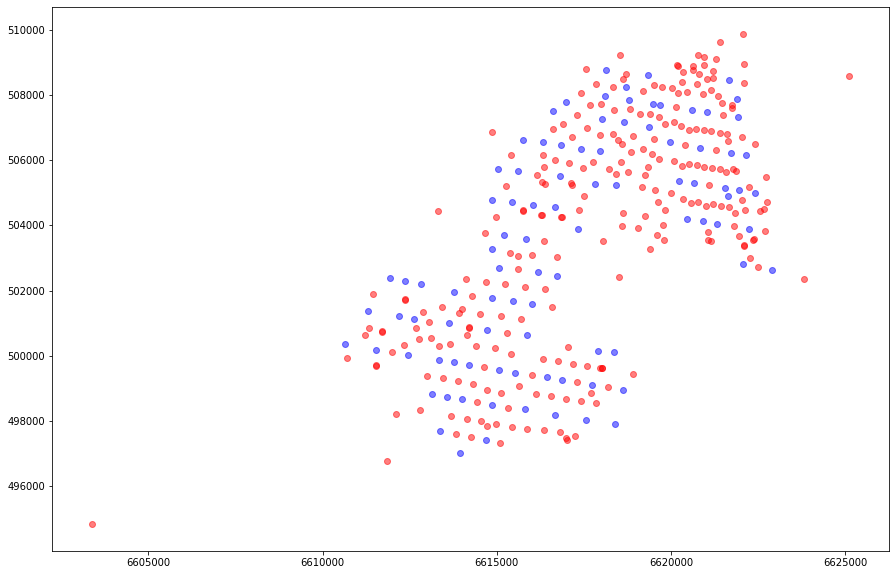

In [117]:
plt.figure(figsize=(15, 10))
plt.scatter(x_water, y_water, color='blue', alpha=0.5)
plt.scatter(x_oil, y_oil, color='red', alpha=0.5)
plt.show()

## statistics ##

In [78]:
df = newest

In [82]:
unique_dates = df.date.unique()

In [99]:
unique_holes = df.num.unique()

In [84]:
print(len(unique_dates))

124


In [85]:
print(df.shape)

(15670, 13)


In [ ]:
water_holes_data = [{} for ]

In [100]:
print(len(water_holes))
print(len(unique_holes))

92
268


In [142]:
timetable_water = {}
for num in water_holes:
    timetable_water[num] = {"work": 0, "no_work": 0} 
for index, row in df.iterrows():
    if row["num"] in water_holes:
        if row["state"] == 1:
            timetable_water[row["num"]]["work"] += 1
        else:
            timetable_water[row["num"]]["no_work"] += 1

In [143]:
print(timetable_water)

{'2069': {'work': 80, 'no_work': 9}, '2583': {'work': 21, 'no_work': 1}, '1887': {'work': 76, 'no_work': 1}, '1289': {'work': 19, 'no_work': 22}, '1528': {'work': 31, 'no_work': 1}, '1949': {'work': 77, 'no_work': 2}, '2524': {'work': 20, 'no_work': 1}, '1591': {'work': 53, 'no_work': 1}, '2180': {'work': 60, 'no_work': 1}, '1531': {'work': 49, 'no_work': 3}, '1832': {'work': 118, 'no_work': 0}, '2003': {'work': 67, 'no_work': 0}, '1822': {'work': 61, 'no_work': 0}, '1472': {'work': 48, 'no_work': 0}, '1939': {'work': 39, 'no_work': 1}, '2010': {'work': 85, 'no_work': 3}, '1975': {'work': 67, 'no_work': 0}, '2463': {'work': 24, 'no_work': 0}, '1914': {'work': 66, 'no_work': 1}, '2096': {'work': 62, 'no_work': 12}, '1831': {'work': 90, 'no_work': 2}, '1650': {'work': 52, 'no_work': 1}, '2079': {'work': 62, 'no_work': 0}, '1689': {'work': 55, 'no_work': 1}, '2011': {'work': 83, 'no_work': 2}, '2004': {'work': 68, 'no_work': 0}, '1715': {'work': 56, 'no_work': 0}, '2092': {'work': 68, 'no

In [144]:
oil_holes = set()
for index, row in df.iterrows():
    if row["type"] == "oil":
        oil_holes.add(row["num"])
    

In [138]:
timetable_water = {}
for num in oil_holes:
    timetable_water[num] = {"work": 0, "no_work": 0} 
for index, row in df.iterrows():
    if row["num"] in oil_holes:
        if row["state"] == 1:
            timetable_water[row["num"]]["work"] += 1
        else:
            timetable_water[row["num"]]["no_work"] += 1

In [140]:
print(timetable_water)

{'10Р': {'work': 65, 'no_work': 4}, '1347': {'work': 19, 'no_work': 1}, '2069': {'work': 80, 'no_work': 9}, '2126': {'work': 73, 'no_work': 2}, '2005': {'work': 77, 'no_work': 0}, '2093': {'work': 75, 'no_work': 1}, '2583': {'work': 21, 'no_work': 1}, '1289': {'work': 19, 'no_work': 22}, '1887': {'work': 76, 'no_work': 1}, '2094': {'work': 74, 'no_work': 6}, '109': {'work': 21, 'no_work': 1}, '1528': {'work': 31, 'no_work': 1}, '101': {'work': 17, 'no_work': 0}, '1741': {'work': 100, 'no_work': 5}, '1711': {'work': 101, 'no_work': 3}, '1978': {'work': 79, 'no_work': 2}, '1590': {'work': 52, 'no_work': 0}, '2524': {'work': 20, 'no_work': 1}, '1889ГС': {'work': 40, 'no_work': 1}, '1591': {'work': 53, 'no_work': 1}, '2180': {'work': 60, 'no_work': 1}, '1949': {'work': 77, 'no_work': 2}, '1531': {'work': 49, 'no_work': 3}, '1918': {'work': 74, 'no_work': 2}, '1409': {'work': 39, 'no_work': 1}, '1832': {'work': 118, 'no_work': 0}, '2099': {'work': 85, 'no_work': 2}, '2003': {'work': 67, 'no